In [2]:
from seirsplus.models import *
import networkx

In [3]:
numNodes = 10000
baseGraph    = networkx.barabasi_albert_graph(n=numNodes, m=9)

In [4]:
G_normal     = custom_exponential_graph(baseGraph, scale=100)

In [5]:
# Social distancing interactions:
G_distancing = custom_exponential_graph(baseGraph, scale=10)

In [6]:
# Quarantine interactions:
G_quarantine = custom_exponential_graph(baseGraph, scale=5)

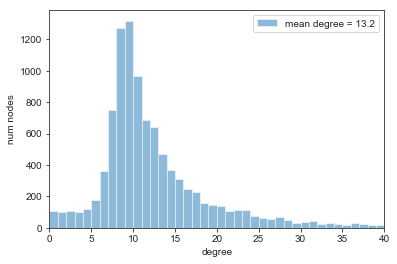

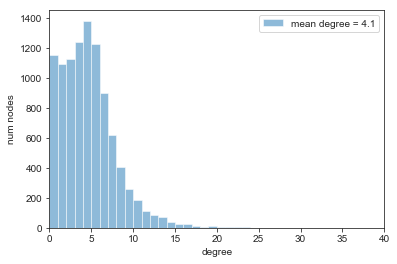

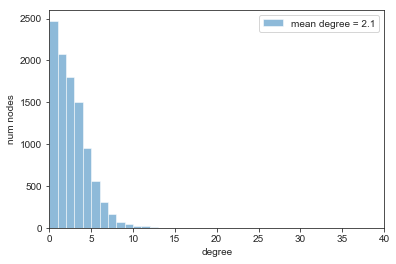

In [10]:
plot_degree_distn(G_normal, max_degree=40)
plot_degree_distn(G_distancing, max_degree=40)
plot_degree_distn(G_quarantine, max_degree=40)

In [8]:
model = SEIRSNetworkModel(G=G_normal, 
                          beta=0.22, 
                          sigma=1/7,
                          gamma=1/12, 
                          mu_I=0.02, 
                          mu_0    =0, 
                          nu      =0, 
                          xi      =0,
                          p=0.5,
                          Q=G_quarantine, 
                          beta_D=0.22, 
                          sigma_D=1/7, 
                          gamma_D=1/12, 
                          mu_D=0.02,
                          theta_E=1, 
                          theta_I=1, 
                          phi_E=1, 
                          phi_I=1, 
                          psi_E=1.0, 
                          psi_I=1.0, 
                          q=0.5,
                          initI=numNodes/100,
                          initE   =0, 
                          initD_E =0, 
                          initD_I =0, 
                          initR   =0, 
                          initF   =0)

checkpoints = {'t': [20, 100], 
               'G': [G_distancing, G_normal], 
               'p': [0.1, 0.5]}

model.run(T=300, checkpoints=checkpoints)

t = 0.01
t = 10.01
[Checkpoint: Updating parameters]
t = 20.08
t = 30.00
t = 40.00
t = 50.00
t = 60.00
t = 70.01
t = 80.01
t = 90.03
[Checkpoint: Updating parameters]
t = 100.04
t = 110.01
t = 120.08
t = 130.35
t = 140.02
t = 170.35


True

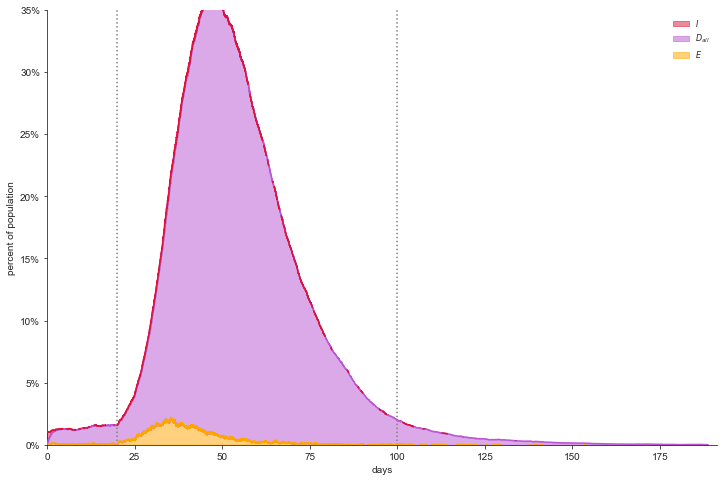

In [9]:
model.figure_infections(vlines=checkpoints['t'], ylim=0.35)